# GlobalGiving take home analysis

## 1. Data exploration and formatting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta

gg_data = pd.read_csv("globalgiving_data_analyst_take_home_data.csv")

In [2]:
gg_data.head()

,id,name,status,country_of_registration,year_founded,original_vetting_approval_date,most_recent_vetting_approval_date,vetting_expiration_date,approx_annual_budget,number_of_currently_active_projects,...,most_recent_project_deactivation_date,last_login,completed_accelerator_program,number_of_field_visits,most_recent_field_visit_date,all_time_funds_raised,all_time_unique_donors,acquisition_source_category,all_time_unque_project_themes,active_contacts
0,8,World Camp,Delinquent - Due Diligence,United States,2001.0,2013-02-26,2013-02-26,2015-02-26,130069.0,0.0,...,2005-03-17 00:00:00,2012-11-30 13:39:52,0,NaN,NaN,411.41,5,word_of_mouth,"Climate Action,Education,Ecosystem Restoration...",1
1,11,Samadhan,Partner,India,1981.0,2010-07-16,2019-10-10,2021-10-10,58078.0,1.0,...,2012-09-28 16:40:09,2020-09-08 02:22:23,0,3.0,2019-07-02,49177.39,244,field,"Child Protection,Economic Growth,Education,Gen...",3
2,12,Ruchika Social Service Organisation,Leader,India,1985.0,2011-11-14,2020-01-06,2022-01-06,407798.0,4.0,...,2008-02-13 00:00:00,2020-06-17 05:52:53,0,3.0,2019-06-10,168601.72,423,renewal,"Child Protection,Education,Ecosystem Restorati...",3
3,15,"Carolina for Kibera, Inc.",Partner,United States,2001.0,2013-01-22,2020-05-13,2022-05-13,889302.0,1.0,...,2019-05-05 00:00:00,2020-09-02 11:08:07,0,1.0,2019-04-17,125605.17,573,globalgiving,"Child Protection,Economic Growth,Education,Eco...",1
4,35,Associacao Saude Crianca,Superstar,Brazil,1991.0,2008-03-12,2019-10-10,2021-10-10,10732.0,2.0,...,2020-07-10 11:33:55,2020-09-13 11:12:09,0,2.0,2015-08-12,55856.20,349,field,"Child Protection,Economic Growth,Education,Gen...",2


In [3]:
gg_data.info()
#gg_data[gg_data["most_recent_project_deactivation_date"].isnull()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19754 entries, 0 to 19753
Data columns (total 25 columns):
id                                       19754 non-null int64
name                                     19754 non-null object
status                                   19754 non-null object
country_of_registration                  19741 non-null object
year_founded                             19284 non-null float64
original_vetting_approval_date           15881 non-null object
most_recent_vetting_approval_date        15880 non-null object
vetting_expiration_date                  19546 non-null object
approx_annual_budget                     18552 non-null float64
number_of_currently_active_projects      8657 non-null float64
number_of_funded_projects                8657 non-null float64
number_of_retired_projects               8657 non-null float64
earliest_project_created_date            8657 non-null object
most_recent_project_created_date         8657 non-null object
earliest_p

In [4]:
# Changing date strings to datetime objects

gg_data['original_vetting_approval_date'] =  pd.to_datetime(gg_data["original_vetting_approval_date"], format='%Y-%m-%d')
gg_data['most_recent_vetting_approval_date'] =  pd.to_datetime(gg_data["most_recent_vetting_approval_date"], format='%Y-%m-%d')
gg_data['vetting_expiration_date'] =  pd.to_datetime(gg_data["vetting_expiration_date"], format='%Y-%m-%d')
gg_data['most_recent_project_deactivation_date'] =  pd.to_datetime(gg_data["most_recent_project_deactivation_date"], format='%Y-%m-%d')
gg_data['most_recent_field_visit_date'] =  pd.to_datetime(gg_data["most_recent_field_visit_date"], format='%Y-%m-%d')

#gg_data.info()


Below, I found the earliest date that a nonprofit was vetted, and checked that the timespan of vetting was around two years.


In [5]:
print(min(gg_data["original_vetting_approval_date"]))

gg_data["vetting_length"] = gg_data["vetting_expiration_date"] - gg_data["most_recent_vetting_approval_date"]
gg_data["vetting_length"].mean()

2004-06-16 00:00:00


Timedelta('745 days 13:33:56.675048')

## 2. Calculating Churn and Retention

I made a list containing dates for the start of every month since GlobalGiving has had an organization join.

In [6]:
my_list = pd.date_range('2004-06-01','2020-07-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()

my_list_dt =  pd.to_datetime(my_list, format='%Y-%m-%d')
print(my_list_dt)


DatetimeIndex(['2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01',
               '2004-10-01', '2004-11-01', '2004-12-01', '2005-01-01',
               '2005-02-01', '2005-03-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', length=194, freq=None)


I created a new data frame, then used a loop to add up the organizations vetted at the beginning of each month, and the organizations that churned during each month. I then used these numbers to calculate the churn and retention.

In [7]:
# New dataframe to calculate churn and retention
my_df = pd.DataFrame()
my_df["date"] = ""
my_df["orgs_at_month_start"] = ""
my_df["orgs_churned_during_month"] = ""

orgs_count = []
orgs_churned_count = []

#Loop that calculates the organizations per month
for entry in my_list_dt:
    month_end = entry + relativedelta(months=1)
    orgs_count.append(len((gg_data[(gg_data["original_vetting_approval_date"]<=entry)])) - len((gg_data[(gg_data["vetting_expiration_date"]<month_end)])))
    orgs_churned_count.append(len((gg_data[(gg_data["vetting_expiration_date"]>=entry) & (gg_data["vetting_expiration_date"]<=month_end)])))


#print(orgs_count)
#print(orgs_churned_count)

my_df["date"] = my_list_dt
my_df["orgs_at_month_start"] = orgs_count 
my_df["orgs_churned_during_month"] = orgs_churned_count
my_df["churn"] = (my_df["orgs_churned_during_month"] / my_df["orgs_at_month_start"]) * 100
my_df["retention"] = 100 - my_df["churn"]
my_df.head()
my_df.tail()

,date,orgs_at_month_start,orgs_churned_during_month,churn,retention
189,2020-03-01,5397,116,2.149342,97.850658
190,2020-04-01,5461,126,2.307270,97.692730
191,2020-05-01,5338,356,6.669164,93.330836
192,2020-06-01,5701,42,0.736713,99.263287
193,2020-07-01,5767,129,2.236865,97.763135


Now that I have a dataframe, I can pull up a quick graph of the retention rates since the beginning of 2019

/Users/cameronhenshaw/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


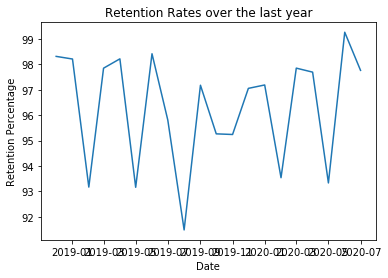

In [8]:
plt.plot(my_df["date"].iloc[174:194],my_df["retention"].iloc[174:194])

plt.title('Retention Rates over the last year')
plt.xlabel('Date')
plt.ylabel('Retention Percentage')
plt.show()

## 3. Correlations

I then wanted to explore what correlates with how long an organization is retained. I started with looking at the number of visits of each organization. I set up a quick scatterplot to visualize the data a bit better, and included colors to show which category the organizations fell into. 

In [9]:
gg_data["time_frame"] = (gg_data["vetting_expiration_date"]) - (gg_data["original_vetting_approval_date"])
gg_data["time_years"] = gg_data["time_frame"]/360
gg_data.head()

gg_data["status"].unique()

gg_data["labels"] = gg_data["status"]

gg_data["labels"].loc[(gg_data["labels"] == 'Delinquent - Due Diligence')] = 0
gg_data["labels"].loc[(gg_data["labels"] == 'Emerging')] = 1
gg_data["labels"].loc[(gg_data["labels"] == 'Partner')] = 2
gg_data["labels"].loc[(gg_data["labels"] == 'Leader')] = 3
gg_data["labels"].loc[(gg_data["labels"] == 'Superstar')] = 4

#gg_data.head()


/Users/cameronhenshaw/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


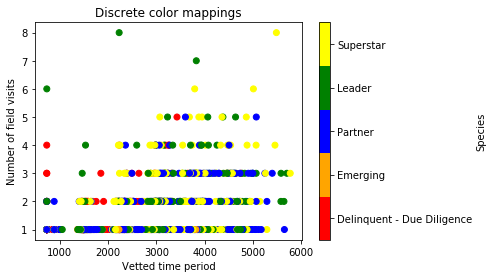

In [10]:
fig, ax = plt.subplots()
x = gg_data["time_frame"].dt.days
y = gg_data["number_of_field_visits"]
label = gg_data["labels"]
colors = ['red','orange','blue', 'green', 'yellow']
bounds = [0, 1, 2, 3, 4]

scat = ax.scatter(x, y, c = label, cmap = mpl.colors.ListedColormap(colors))
ax.set_xlabel('Vetted time period')
ax.set_ylabel('Number of field visits')

cb = plt.colorbar(scat)
loc= [.4, 1.2, 2, 2.8, 3.6]
cb_label = ['Delinquent - Due Diligence', 'Emerging', 'Partner', "Leader", "Superstar"]
cb.set_ticks(loc)
cb.set_ticklabels(cb_label)
cb.set_label('Species')
ax.set_title('Discrete color mappings')
plt.show()

I had wanted to make a few more scatterplots, but ran out of time. 


In [11]:
gg_data["time_frame_int"] = gg_data["time_frame"].dt.days

gg_data.corr(method ='pearson')

,id,year_founded,approx_annual_budget,number_of_currently_active_projects,number_of_funded_projects,number_of_retired_projects,completed_accelerator_program,number_of_field_visits,all_time_funds_raised,all_time_unique_donors,active_contacts,labels,time_frame_int
id,1.000000,0.082778,0.001992,-0.017025,-0.113140,-0.133430,-0.132428,-0.314308,-0.100896,-0.180565,0.025139,0.279787,-0.494310
year_founded,0.082778,1.000000,-0.006211,0.016293,-0.018965,-0.012901,0.044072,-0.011551,-0.024625,0.004779,0.011596,0.042631,-0.019350
approx_annual_budget,0.001992,-0.006211,1.000000,-0.001567,0.009147,0.002217,-0.005975,0.001890,0.001664,0.000961,-0.002697,0.008334,-0.000339
number_of_currently_active_projects,-0.017025,0.016293,-0.001567,1.000000,0.176379,0.127576,0.132716,0.109010,0.180070,0.283393,0.157955,0.295511,0.172544
number_of_funded_projects,-0.113140,-0.018965,0.009147,0.176379,1.000000,0.508169,0.064684,0.177727,0.195732,0.420047,0.115688,0.111272,0.175157
number_of_retired_projects,-0.133430,-0.012901,0.002217,0.127576,0.508169,1.000000,0.042064,0.158580,0.116900,0.311004,0.037649,0.044655,0.158029
completed_accelerator_program,-0.132428,0.044072,-0.005975,0.132716,0.064684,0.042064,1.000000,-0.057767,0.072582,0.203839,0.338538,0.497025,0.298127
number_of_field_visits,-0.314308,-0.011551,0.001890,0.109010,0.177727,0.158580,-0.057767,1.000000,0.153243,0.322494,0.154155,0.219959,0.413487
all_time_funds_raised,-0.100896,-0.024625,0.001664,0.180070,0.195732,0.116900,0.072582,0.153243,1.000000,0.348186,0.149965,0.172629,0.243182
all_time_unique_donors,-0.180565,0.004779,0.000961,0.283393,0.420047,0.311004,0.203839,0.322494,0.348186,1.000000,0.215110,0.287465,0.403548
